# OpenCV Image Operations

### Libraries and necessary functions

In [1]:
import numpy as np
import cv2, os, pdf2image, shutil
from flask import Flask,request,jsonify
from PIL import Image
from fpdf import FPDF
from wand.image import Image as WImage
from datetime import datetime
from matplotlib import pyplot as plt


# Delete temp folder containing png files from each page
def deleteTempFolderForImages(oPath):
    shutil.rmtree(oPath)

# Create a temp folder to store each png file converted from each pdf page
def createTempFolderForImages(basePath):
    tstamp = datetime.today().strftime('%Y%m%d%H%M%S')
    OPath = basePath+"/"+"IMGS_"+tstamp
    try:
        os.mkdir(OPath)
    except OSError:
        print ("Creation of the directory %s failed" % OPath)
        return ""
    else:
        #print ("Successfully created the directory %s " % OPath)
        return OPath
    
    
# Converts a PDF into images (png)
def convertPdfToImages(basePath, FileName):
    oPath = createTempFolderForImages(basePath)
    if(oPath != ""):
        images = pdf2image.convert_from_path(basePath+"/"+FileName, fmt='png')
        listofimages = []
        idx = 0
        for page in images:
            idx = idx + 1
            FileOut = oPath+"/"+str(idx)+'_out.png'
            page.save(FileOut, 'png')
            listofimages.append(FileOut)

    return listofimages,oPath

# Converts a list of png images back into a multi-page pdf file
def convertImagesToPdf(myImages,basePath, outputPdfFile):

    pdf = FPDF()
    # imagelist is the list with all image filenames
    for i in myImages:
        #print(i)
        pdf.add_page()
        print(i)
        pdf.image(i,0,0,210,297)
        
    pdf.output(basePath+'/'+outputPdfFile, "F")
    return 0

# Defines the output of openCV calls
class CVOutput:
    def __init__(self,image,error):
        self.image = image
        self.error = error
        
        

### OpenCV Operations

In [2]:
def OTSUBinarization(image):
    #Inter-Cubic Interpolation
    try:
        ret,processedImage = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [3]:
def RegularBinarization(image):
    #Inter-Cubic Interpolation
    try:
        ret,processedImage = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [4]:
def MorphEx(image):
    #Inter-Cubic Interpolation
    try:
        rectKernel = cv2.StructuralElement(cv2.MORPH_RECT, (154,682),(965,683))
        processedImage = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, rectKernel)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [5]:
def Blur(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.blur(image,(3,3))
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [6]:
def ClaheHistoEqualization(image):
    #Inter-Cubic Interpolation
    try:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        processedImage = clahe.apply(image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [7]:
def HistoEqualization(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.equalizeHist(image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [8]:
def UnsharpMasking(image):
    #Inter-Cubic Interpolation
    try:
        gaussian_3 = cv2.GaussianBlur(image, (1,1), 0)
        processedImage = cv2.addWeighted(image, 1.5, gaussian_3, -0.5, 0, image)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut

In [9]:
def IntercubicInterpolation(image):
    #Inter-Cubic Interpolation
    try:
        processedImage = cv2.resize(image, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        ObjOut = CVOutput(None,e)
    return ObjOut


In [10]:
def GrayScaling(image):
    #Gray Scaling
    try:
        #processedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        processedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        print("Error:"+str(e))
        ObjOut = CVOutput(None,e)
    return ObjOut


In [11]:
def getImageAsArray(image):
    img = np.asarray(image)
    #plt.figure(figsize=(20,20))
    #plt.imshow(img)
    return img

In [12]:
def ConvertToHSV(image):
    #Inter-Cubic Interpolation
    try:

        iArr = getImageAsArray(image)
        
        processedImage = cv2.cvtColor(iArr, cv2.COLOR_RGB2HSV)
        
        plt.figure(figsize=(20,20))
        plt.imshow(processedImage)
        ObjOut = CVOutput(processedImage,None)
    except Exception as e:
        print(str(e))
        ObjOut = CVOutput(None,e)
    return ObjOut



## Processing a PDF File

#### Converts pdf file into multiple png images, run OpenCV operations on each image and then recombine all pngs into a multi-page pdf file

/home/bren/git/pdf_samples//IMGS_20190817105402/1_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/2_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/3_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/4_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/5_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/6_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/7_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/8_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/9_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/10_out.png
/home/bren/git/pdf_samples//IMGS_20190817105402/11_out.png


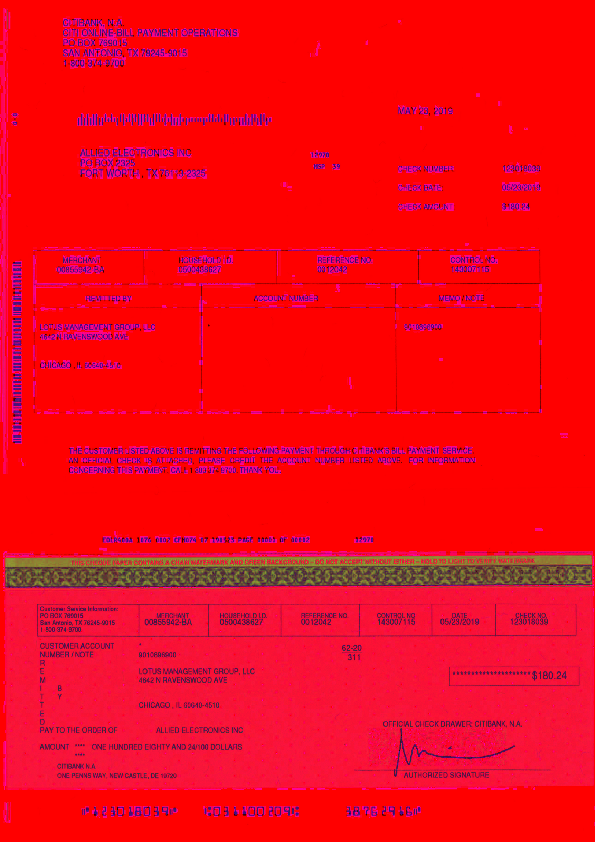

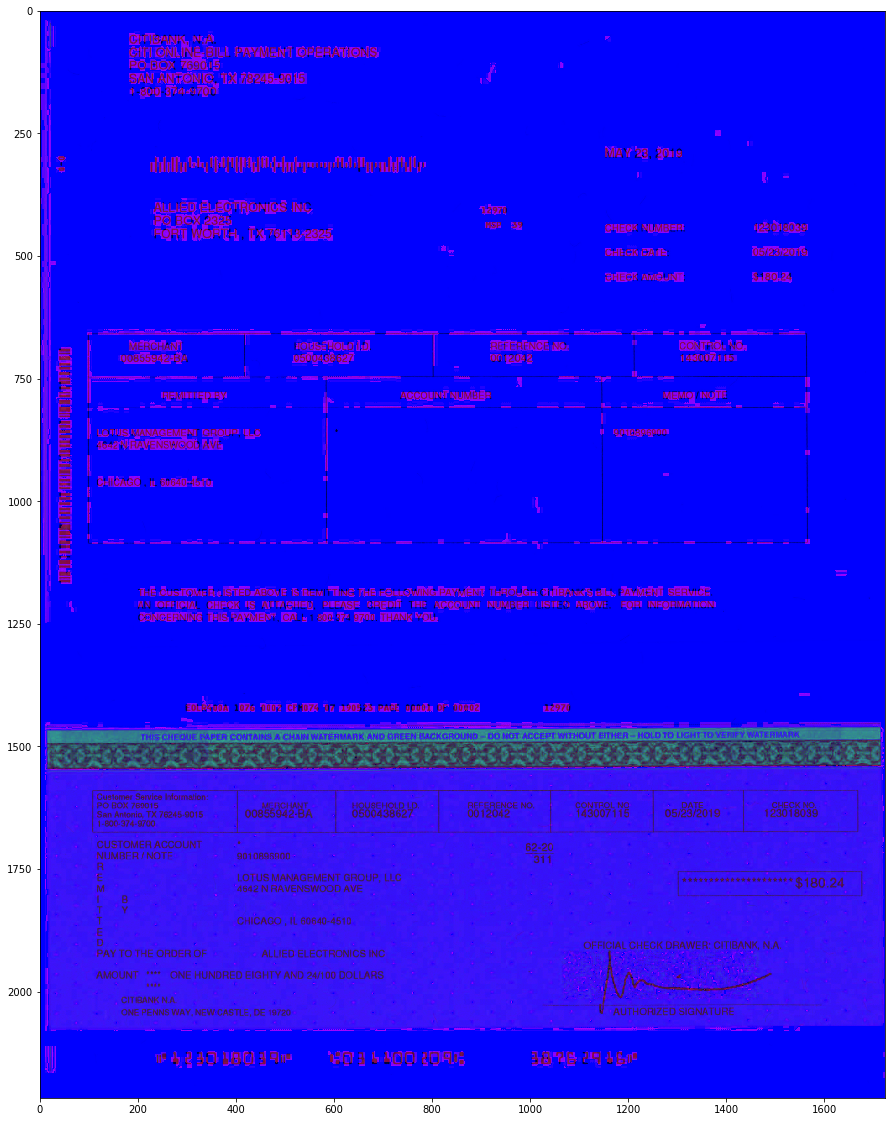

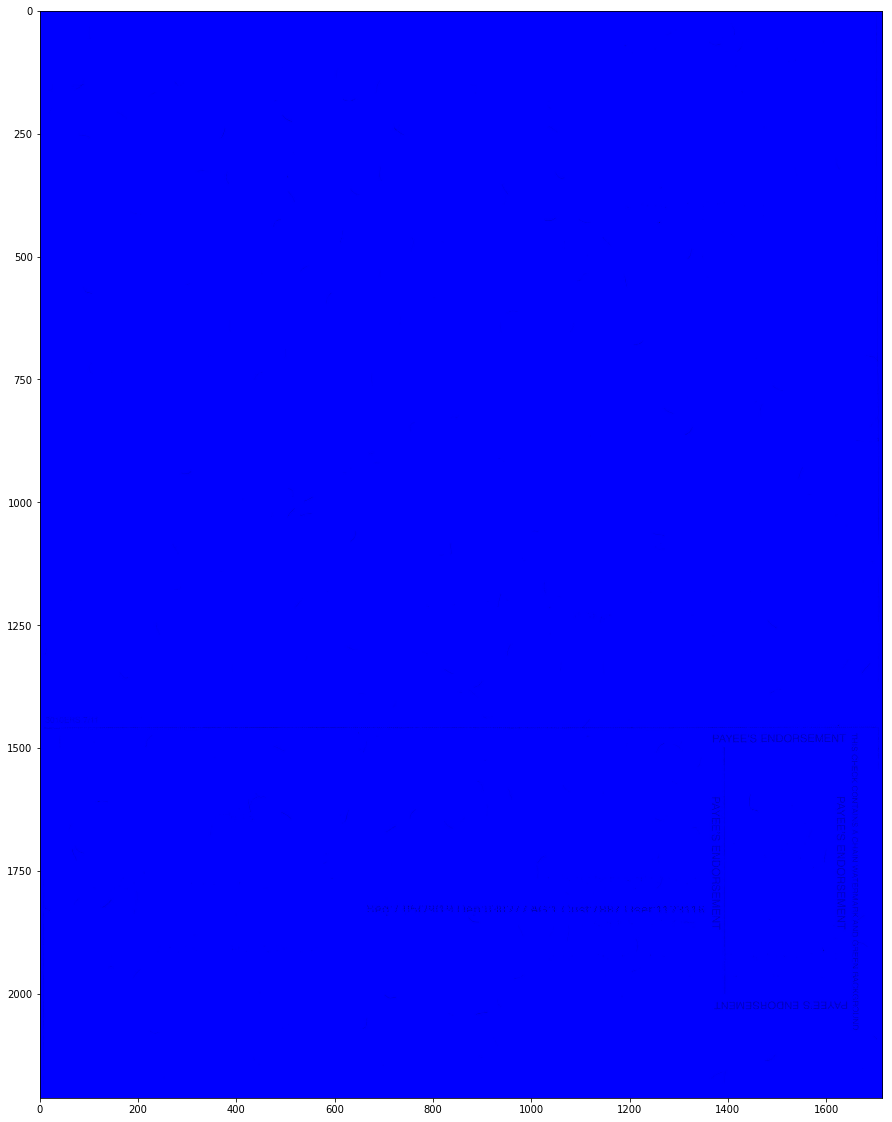

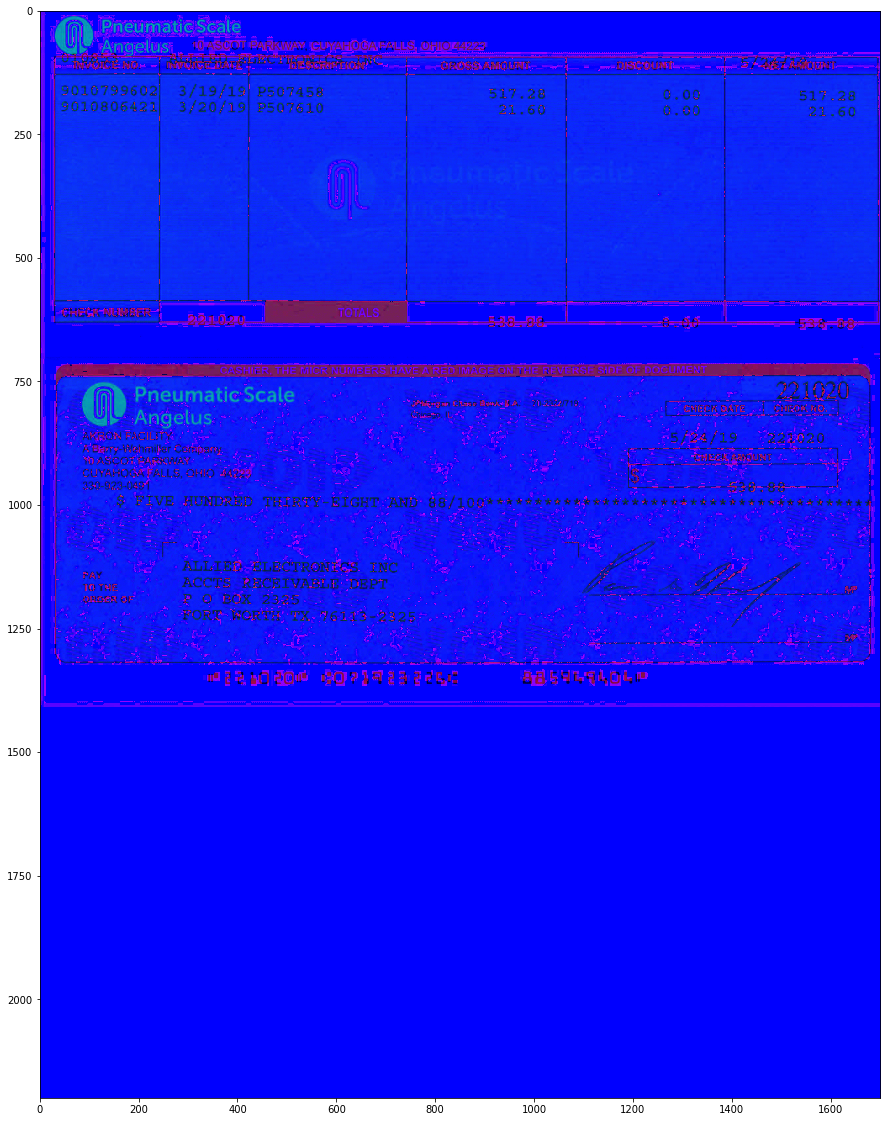

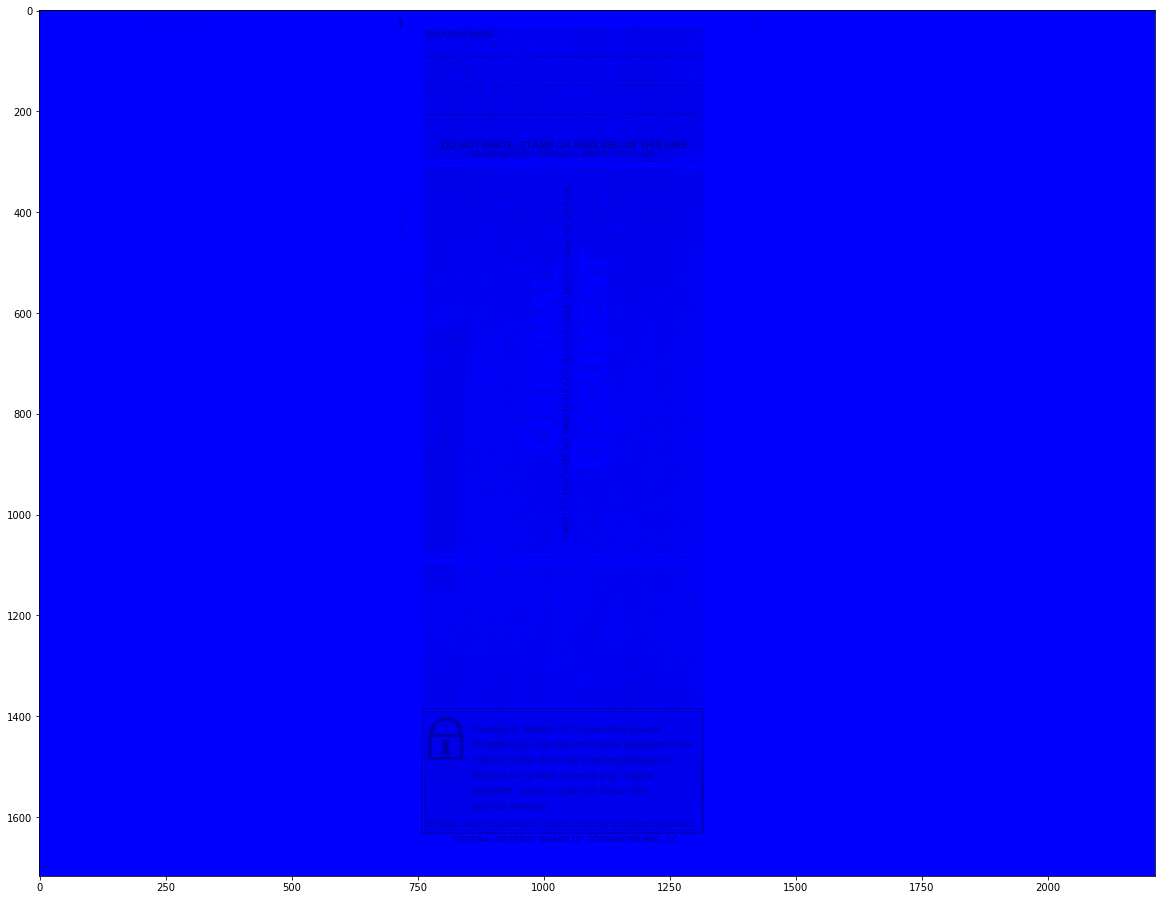

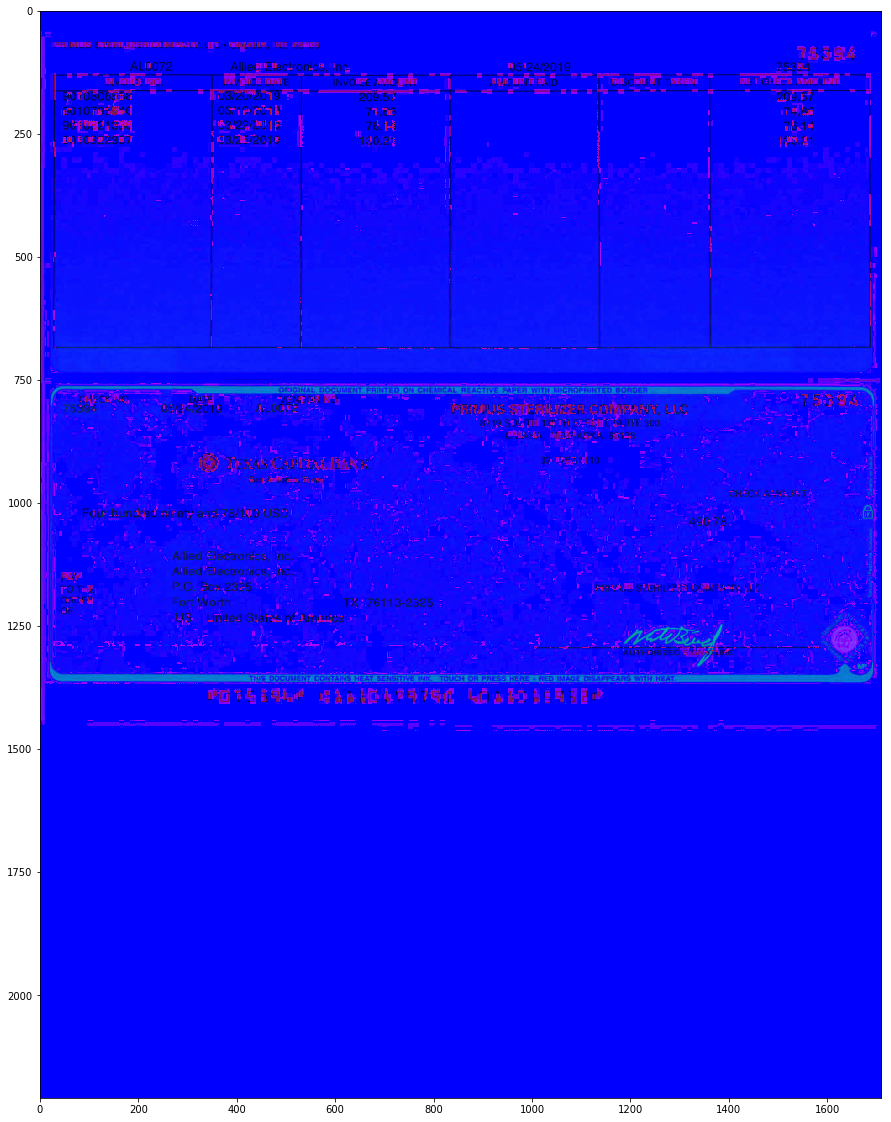

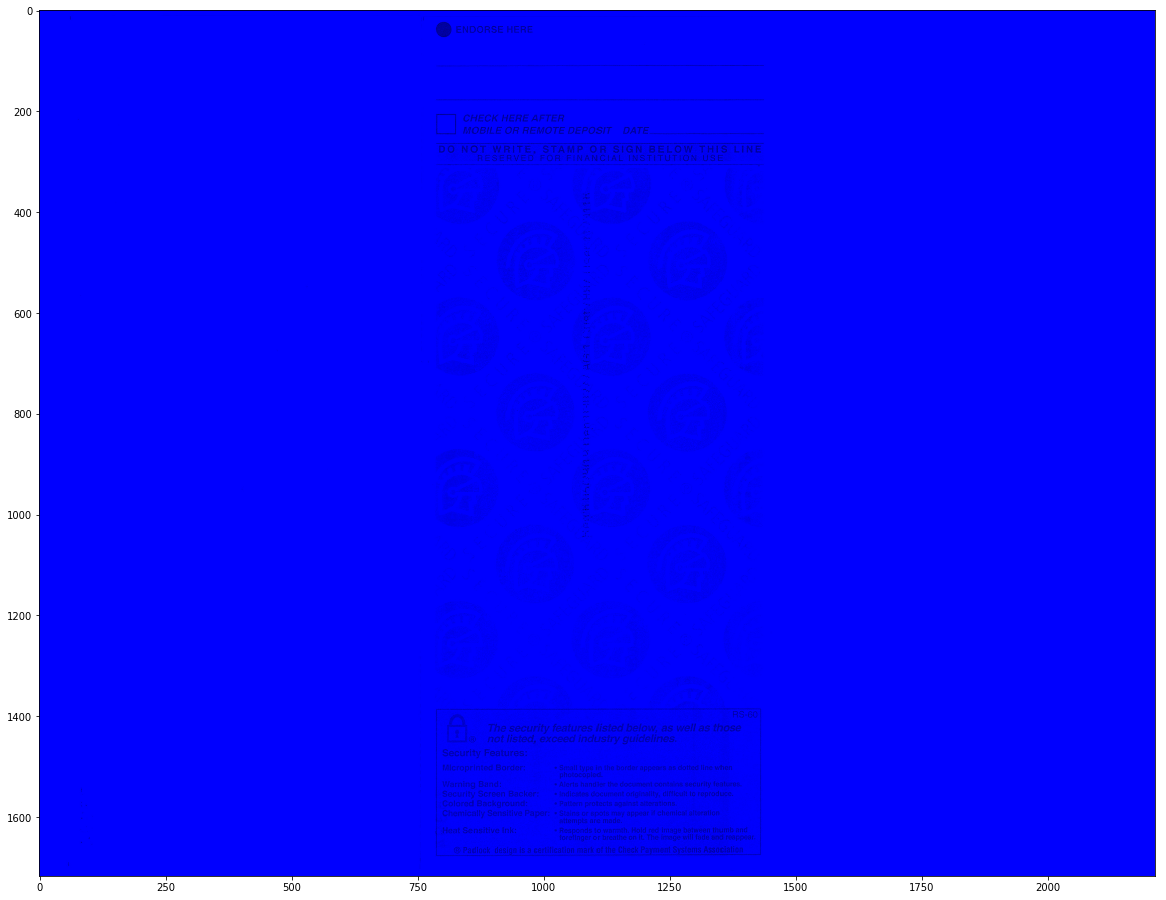

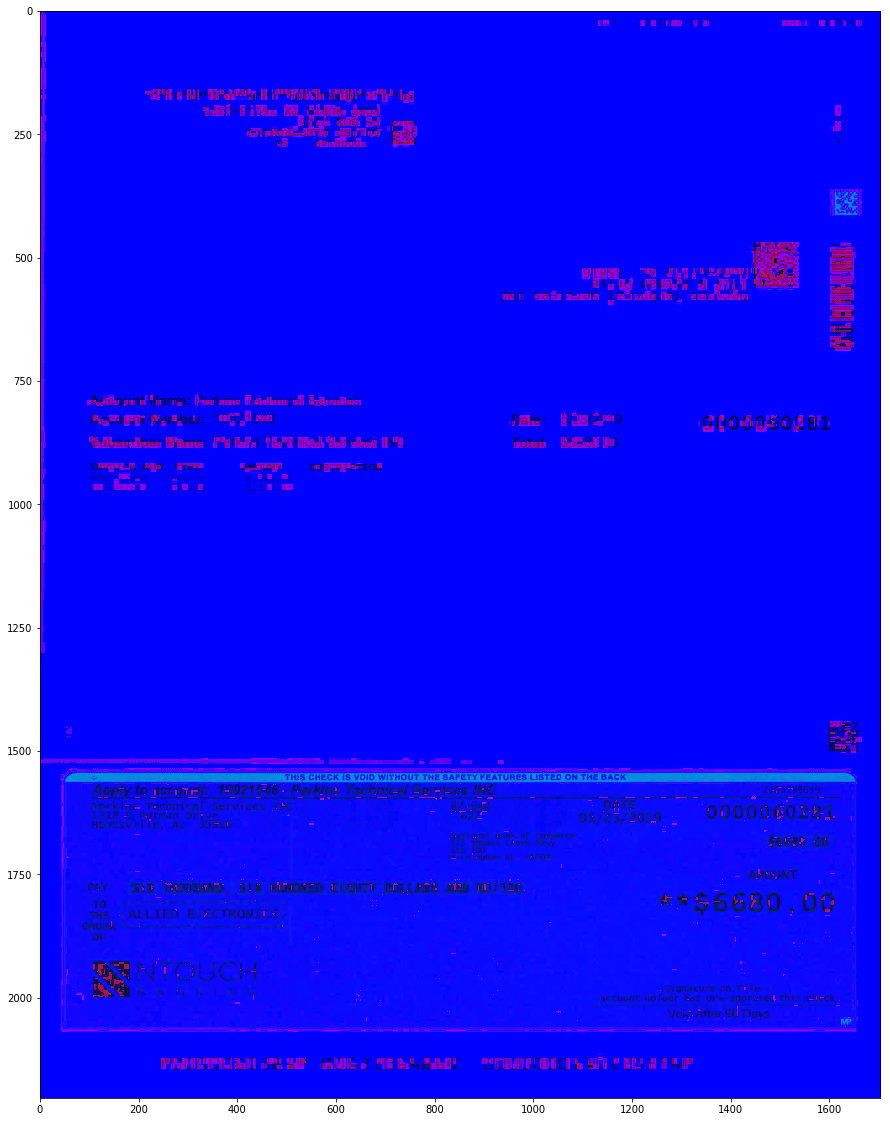

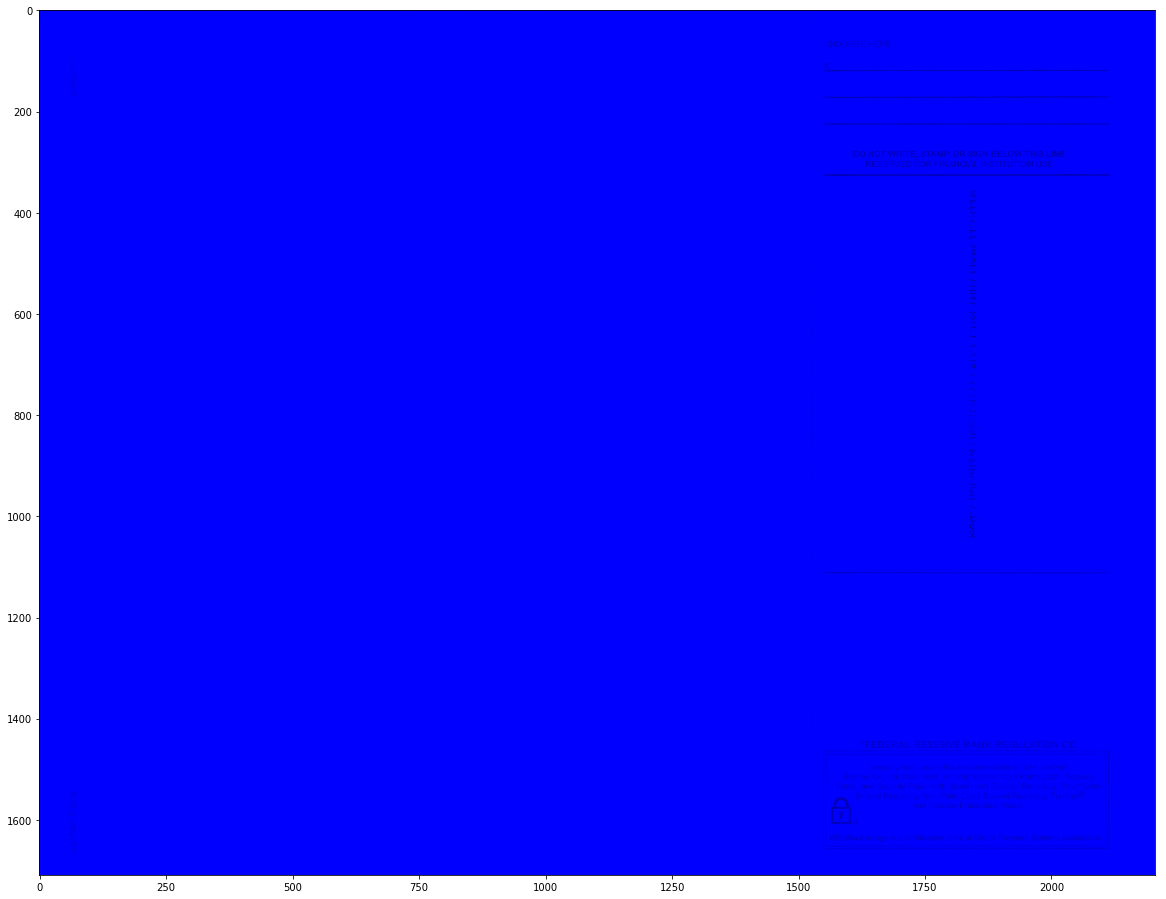

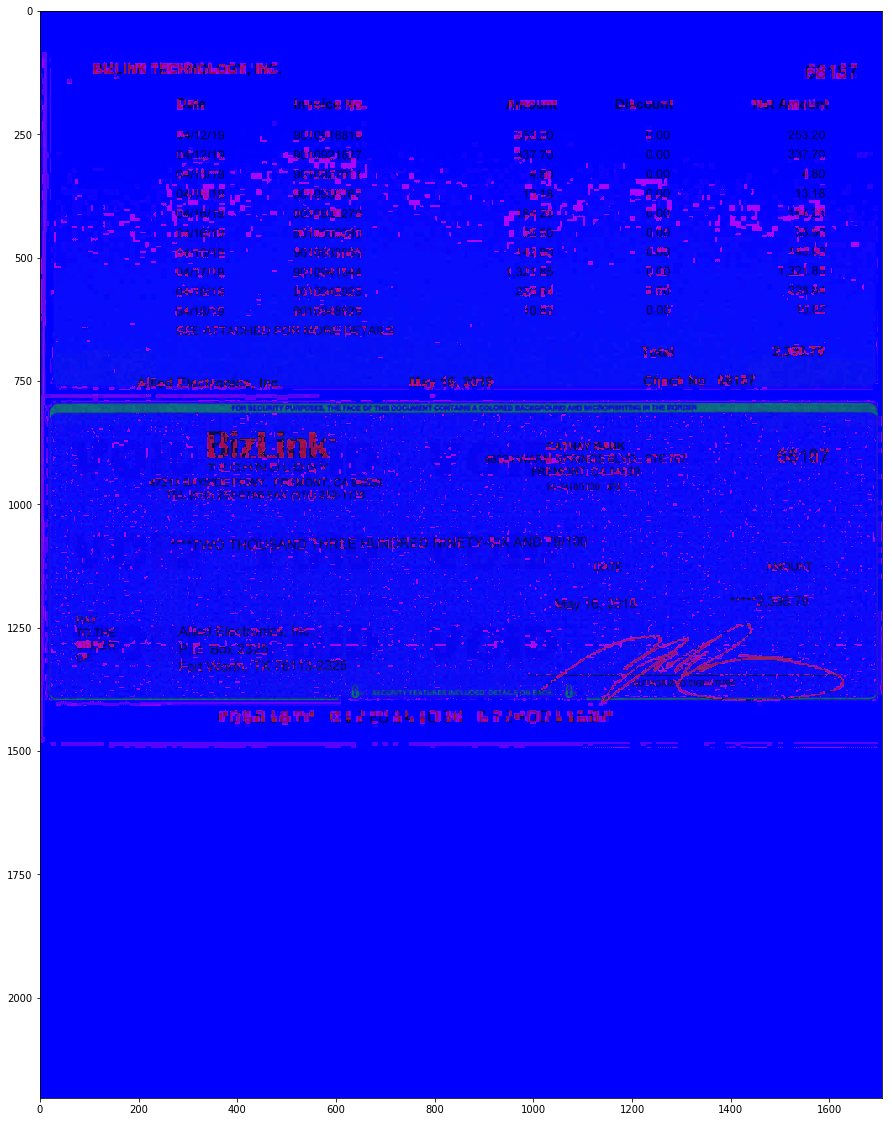

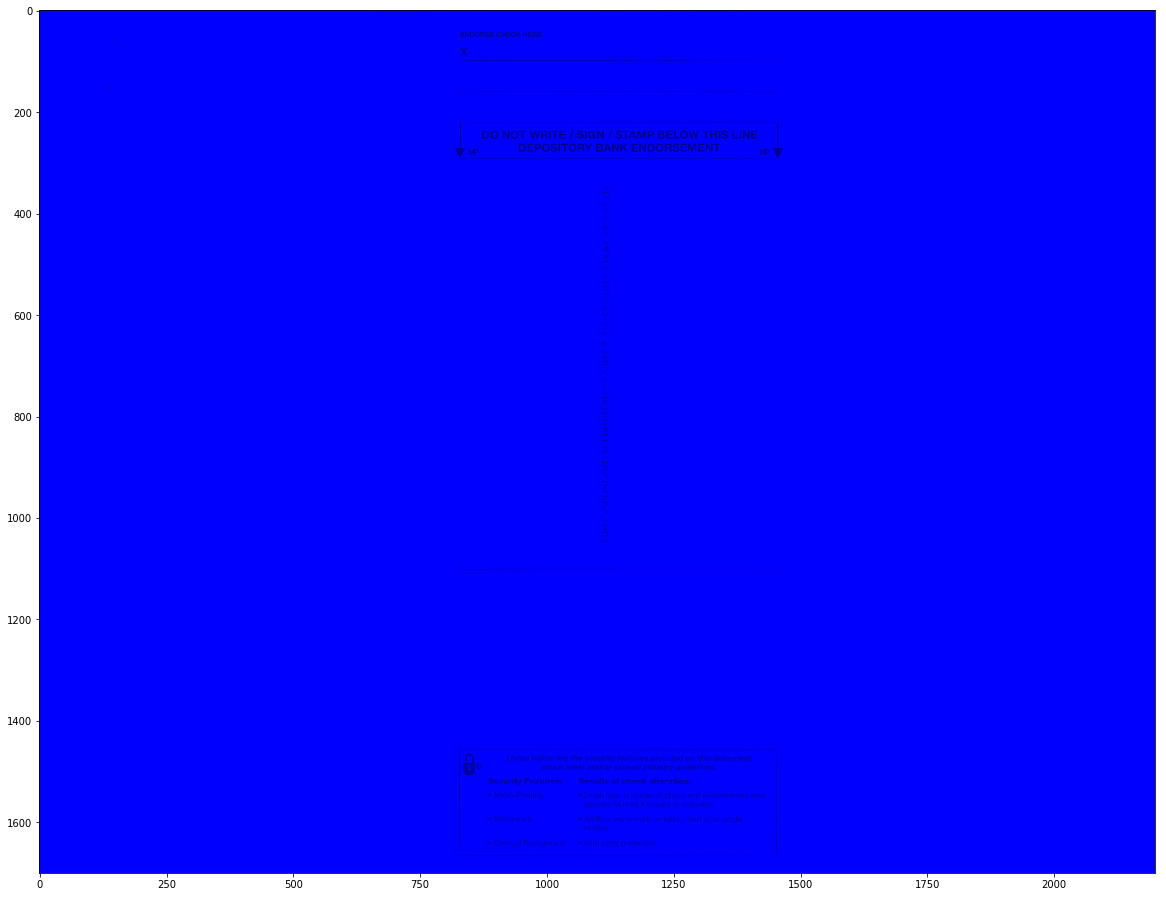

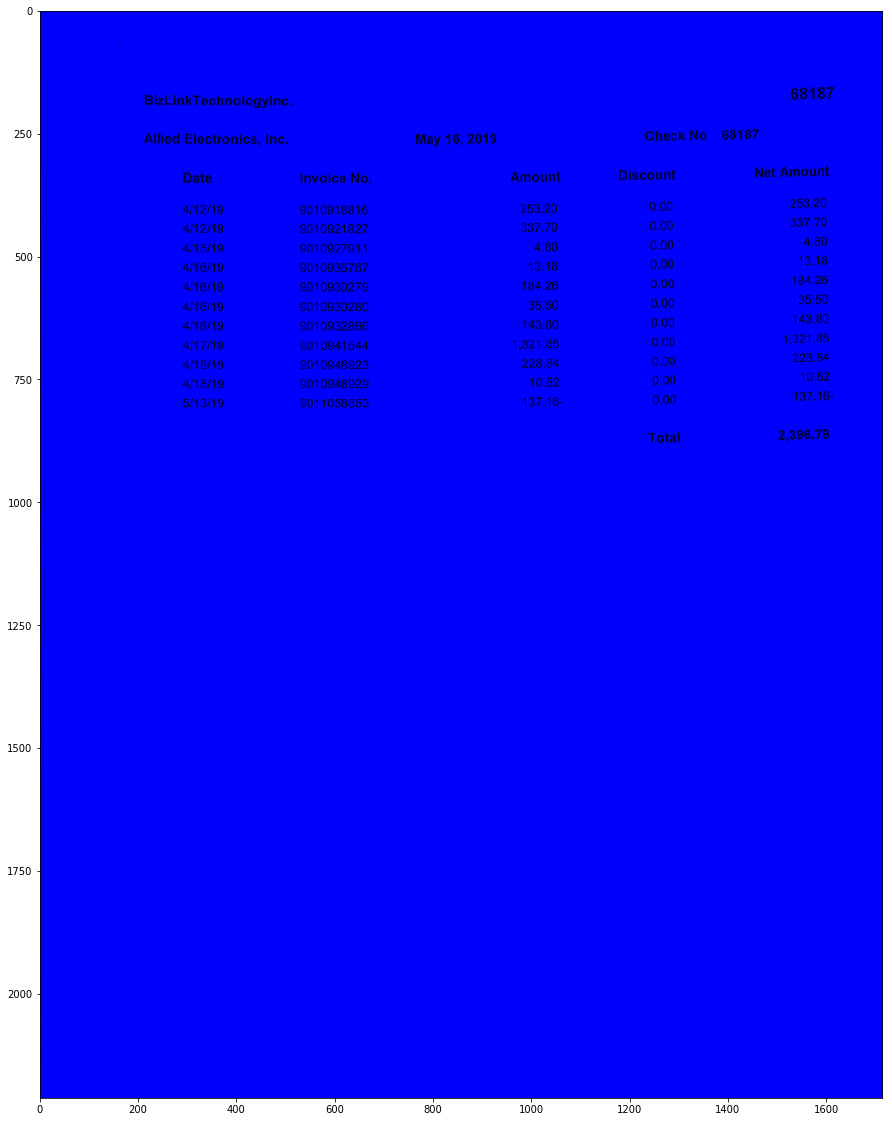

In [13]:
InputFileName = 'c1.pdf'
OutputFileName = 'c1_OUT_BIN.pdf'
BasePath = '/home/bren/git/pdf_samples/'

images = []
images,oPath = convertPdfToImages(BasePath, InputFileName)

## Image Processing should occur here
for img in images:
    #print("Debug:"+img)
    image = cv2.imread(img) #imread(img,0) to load in grayscale
    
    oi = ConvertToHSV(image)
    
    cv2.imwrite(img,oi.image)

## End of Image processing

convertImagesToPdf(images, BasePath, OutputFileName)
deleteTempFolderForImages(oPath)

# display the pdf
img = WImage(filename=BasePath+OutputFileName)
img